#                     Problem Statement


An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

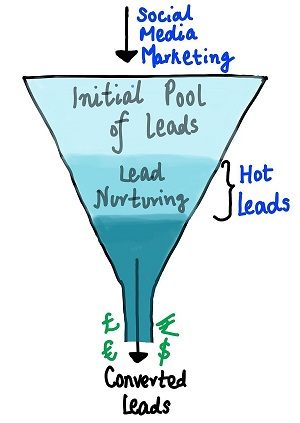

"The company requires a model that will assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance."



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 50)

In [2]:
# Importing data
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# checking all the statistical information of numerical variables
df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.97,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
97%,657466.940000,1.000000,11.000000,1660.000000,7.000000,17.000000,20.000000


# Dealing with Outliers and Missing Values

*There seems to be some outlier assocaited with "TotalVisits","Total Time Spent on Website" and "Page Views Per Visit" as there is huge gap between 99 and 100 percentile*

In [4]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
outlier = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for col in outlier: 
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df = df.loc[(df[col] > range_low) & (df[col] < range_high)]

df.shape

(8597, 37)

In [5]:
# Treating Select values as Null Values
df.replace('Select', pd.NA, inplace=True)

In [6]:
#Checking for the Null Values
df.isnull().sum().sort_values(ascending=False)/len(df)*100

How did you hear about X Education               78.399442
Lead Profile                                     74.537629
Lead Quality                                     52.390369
Asymmetrique Profile Score                       46.120740
Asymmetrique Activity Score                      46.120740
Asymmetrique Profile Index                       46.120740
Asymmetrique Activity Index                      46.120740
City                                             40.967779
Specialization                                   37.547982
Tags                                             37.036175
What matters most to you in choosing a course    30.045365
What is your current occupation                  29.835989
Country                                          26.939630
Lead Source                                       0.337327
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.0000

In [7]:
#Sorting the null Values
df.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               6740
Lead Profile                                     6408
Lead Quality                                     4504
Asymmetrique Profile Score                       3965
Asymmetrique Activity Score                      3965
Asymmetrique Profile Index                       3965
Asymmetrique Activity Index                      3965
City                                             3522
Specialization                                   3228
Tags                                             3184
What matters most to you in choosing a course    2583
What is your current occupation                  2565
Country                                          2316
Lead Source                                        29
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Prospect ID                                         0
Through Recommendations                             0
I agree to pay the amount th

In [8]:
# Identify columns with null values exceeding 30%
null_percentage = (df.isnull().sum() / len(df)) * 100
columns_to_drop = null_percentage[null_percentage > 30].index

# Drop the identified columns
df = df.drop(columns=columns_to_drop)

In [9]:
#Sorting the null Values
df.isnull().sum().sort_values(ascending=False)/len(df)*100

What is your current occupation             29.835989
Country                                     26.939630
Lead Source                                  0.337327
Prospect ID                                  0.000000
Newspaper Article                            0.000000
A free copy of Mastering The Interview       0.000000
I agree to pay the amount through cheque     0.000000
Get updates on DM Content                    0.000000
Update me on Supply Chain Content            0.000000
Receive More Updates About Our Courses       0.000000
Through Recommendations                      0.000000
Digital Advertisement                        0.000000
Newspaper                                    0.000000
X Education Forums                           0.000000
Search                                       0.000000
Magazine                                     0.000000
Lead Number                                  0.000000
Last Activity                                0.000000
Page Views Per Visit        

In [10]:
#checking value counts of "What is your current occupation" column
df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5169
NaN                     2565
Working Professional     637
Student                  199
Other                     12
Housewife                  9
Businessman                6
Name: count, dtype: int64

In [11]:
#Filling up blank value
df['What is your current occupation'].fillna('Unemployed', inplace=True)

In [12]:
#checking value counts of "Country" column
df['Country'].value_counts(dropna=False)

Country
India                   6010
NaN                     2316
United States             65
United Arab Emirates      50
Singapore                 23
Saudi Arabia              20
Australia                 13
United Kingdom            13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     5
Nigeria                    4
Canada                     4
unknown                    4
Kuwait                     4
Germany                    4
South Africa               3
Italy                      2
Bangladesh                 2
Uganda                     2
Philippines                2
Sweden                     2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Netherlands                1
Liberia                    1
Switze

In [13]:
# As Maximum values are from India, filling the Null Vales with India
df['Country'].fillna('India', inplace=True)

In [14]:
df['Country'] = np.where(df['Country'].eq('India'), 'India', 'Other')

In [15]:
#checking value counts of "Country" column
df['Country'].value_counts(dropna=False)

Country
India    8326
Other     271
Name: count, dtype: int64

In [16]:
#Sorting the null Values
df.isnull().sum().sort_values(ascending=False)/len(df)*100


Lead Source                                 0.337327
Prospect ID                                 0.000000
Magazine                                    0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
X Education Forums                          0.000000
Newspaper Article                           0.000000
Search                                      0.000000
Lead Number                                 0.000000
What is your current occupation             0.000000
Country                                     0.000000
Last Activity                               0.000000
Page Views Per Visit                        0.

Mostly the people looking for this course are in Management or Business. But, there are too many missing NAN and unSelected values which makes no sense for the modelling purpose.Thus dropping the column

In [17]:
#Dropping unwanted columns at it contains mostly No

df.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Prospect ID','Do Not Email','Do Not Call','Get updates on DM Content','Update me on Supply Chain Content',
        'I agree to pay the amount through cheque',], axis = 1, inplace = True)

In [18]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100


Lead Source                               0.337327
Lead Number                               0.000000
Lead Origin                               0.000000
Converted                                 0.000000
TotalVisits                               0.000000
Total Time Spent on Website               0.000000
Page Views Per Visit                      0.000000
Last Activity                             0.000000
Country                                   0.000000
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [19]:
# Checking Lead Source Column
df['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2741
Direct Traffic       2389
Olark Chat           1742
Organic Search        966
Reference             441
Welingak Website      128
Referral Sites        105
Facebook               30
NaN                    29
bing                    6
google                  5
Click2call              3
Social Media            2
Live Chat               2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
Press_Release           1
NC_EDM                  1
Name: count, dtype: int64

In [20]:
#Only 29 rows are Empty we can fill it will maximum occuring value i.e Google
df['Lead Source'].fillna('Google', inplace=True)


In [21]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [22]:
df['Lead Origin'].value_counts(dropna=False)

Lead Origin
Landing Page Submission    4502
API                        3461
Lead Add Form               604
Lead Import                  30
Name: count, dtype: int64

In [23]:
df['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2770
Direct Traffic       2389
Olark Chat           1742
Organic Search        966
Reference             441
Welingak Website      128
Referral Sites        105
Facebook               30
bing                    6
google                  5
Click2call              3
Social Media            2
Live Chat               2
youtubechannel          1
Press_Release           1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [24]:
lead_source_counts = df['Lead Source'].value_counts()
# Identify lead sources with counts less than 100
less_than_100 = lead_source_counts[lead_source_counts < 100].index

# Replace those lead sources with 'Others'
df['Lead Source'] = np.where(df['Lead Source'].isin(less_than_100), 'Others', df['Lead Source'])

In [25]:
df['Lead Source'].value_counts(dropna=False)

Lead Source
Google              2770
Direct Traffic      2389
Olark Chat          1742
Organic Search       966
Reference            441
Welingak Website     128
Referral Sites       105
Others                56
Name: count, dtype: int64

In [26]:
df['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3250
SMS Sent                        2598
Olark Chat Conversation          948
Page Visited on Website          522
Converted to Lead                425
Email Bounced                    306
Email Link Clicked               257
Form Submitted on Website        111
Unreachable                       84
Unsubscribed                      60
Had a Phone Conversation          21
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [27]:
# Reducing the Number of Features based on Activity Type
df['Activity Category'] = df['Last Activity'].apply(lambda x: 'Email' if 'Email' in x else x)
df['Last Notable Activity'] = df['Last Notable Activity'].apply(lambda x: 'Email' if 'Email' in x else x)


In [28]:
df['Activity Category'].value_counts()

Activity Category
Email                           3817
SMS Sent                        2598
Olark Chat Conversation          948
Page Visited on Website          522
Converted to Lead                425
Form Submitted on Website        111
Unreachable                       84
Unsubscribed                      60
Had a Phone Conversation          21
Approached upfront                 5
View in browser link Clicked       4
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [29]:
Activity_Category_counts = df['Last Notable Activity'].value_counts()
# Identify lead sources with counts less than 100
less_than_100 = Activity_Category_counts[Activity_Category_counts < 100].index

# Replace those lead sources with 'Others'
df['Last Notable Activity'] = np.where(df['Last Notable Activity'].isin(less_than_100), 'Others', df['Last Notable Activity'])


In [30]:
Activity_Category_counts = df['Activity Category'].value_counts()
# Identify lead sources with counts less than 100
less_than_100 = Activity_Category_counts[Activity_Category_counts < 100].index

# Replace those lead sources with 'Others'
df['Activity Category'] = np.where(df['Activity Category'].isin(less_than_100), 'Others', df['Activity Category'])

In [31]:
df['Activity Category'].value_counts()

Activity Category
Email                        3817
SMS Sent                     2598
Olark Chat Conversation       948
Page Visited on Website       522
Converted to Lead             425
Others                        176
Form Submitted on Website     111
Name: count, dtype: int64

In [32]:
df.drop('Last Activity',axis=1,inplace=True)
df.rename(columns={'Activity Category': 'Last Activity'}, inplace=True)


In [33]:
df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              7734
Working Professional     637
Student                  199
Other                     12
Housewife                  9
Businessman                6
Name: count, dtype: int64

# EDA

### Checking if Data is Imbalanced or not
- Data is imbalance when one value is present in majority and other is in minority meaning an uneven distribution of observations in dataset
- Data imbalance is in the context of Target variable only
- `Target variable` is `'Converted'` which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted 

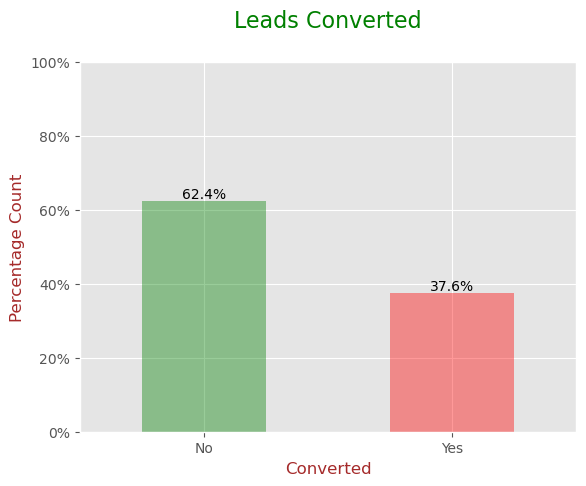

In [34]:
## ploting the results on bar plot

ax=(100*df["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

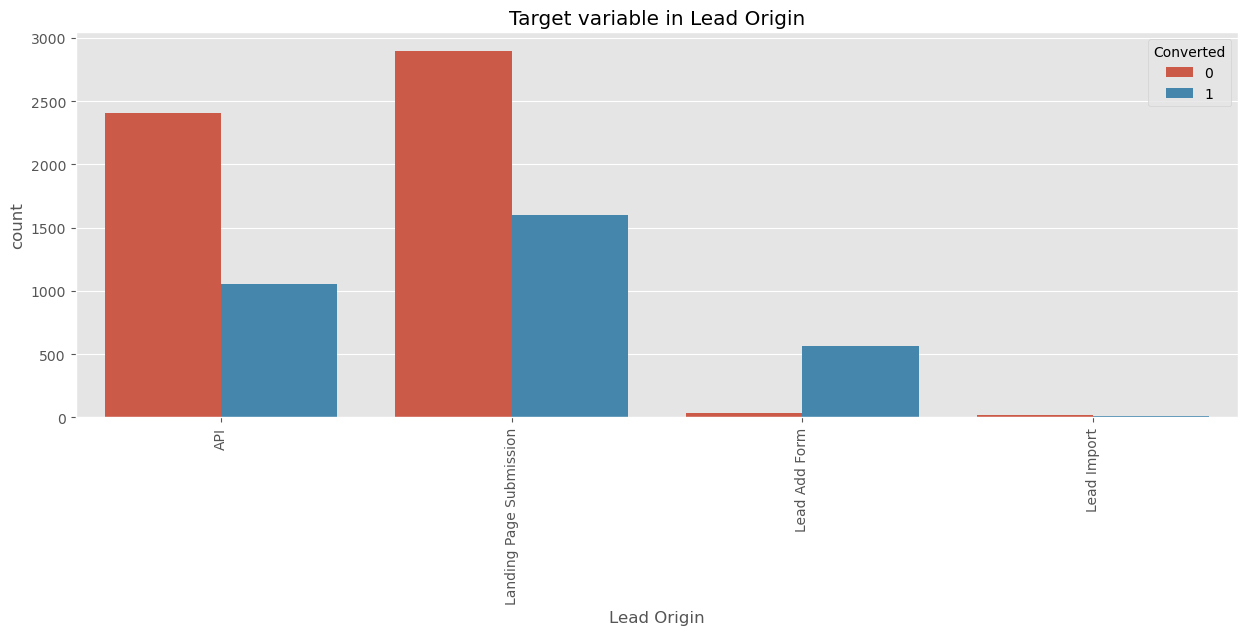

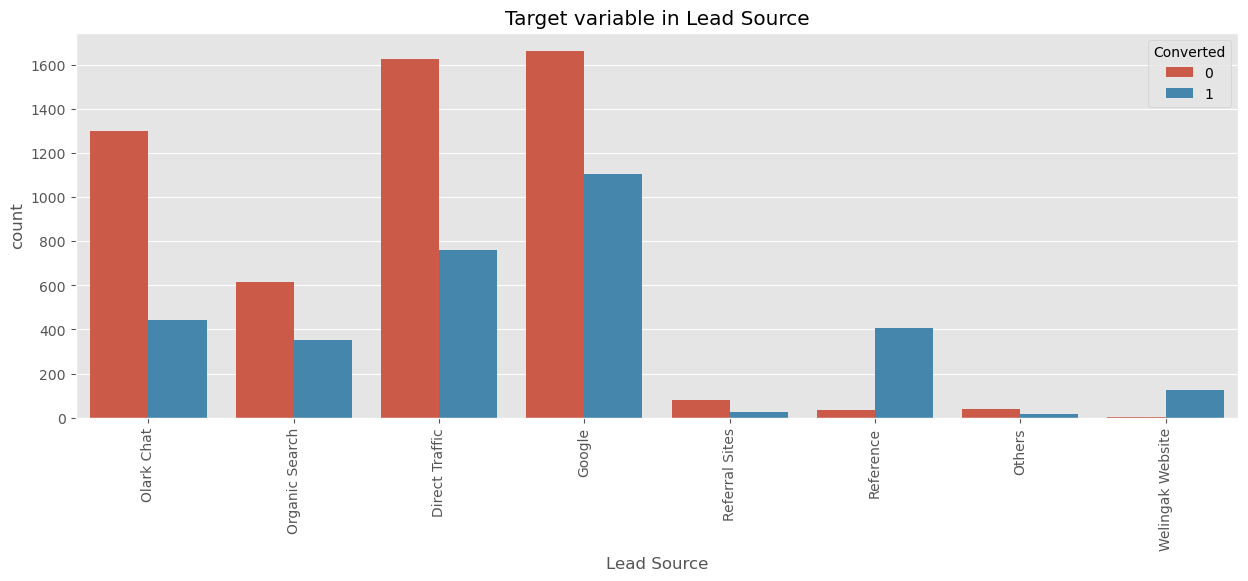

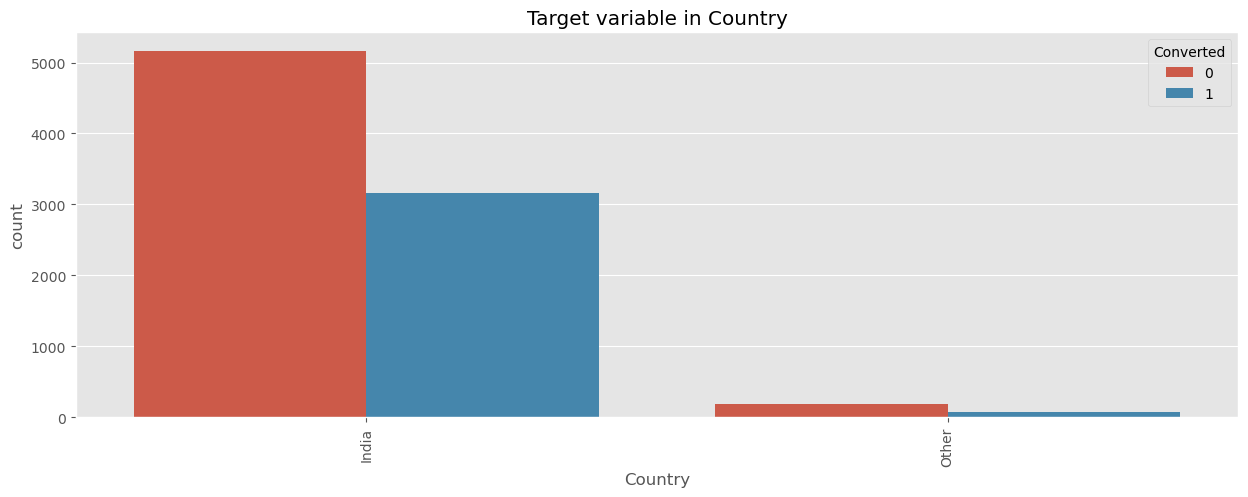

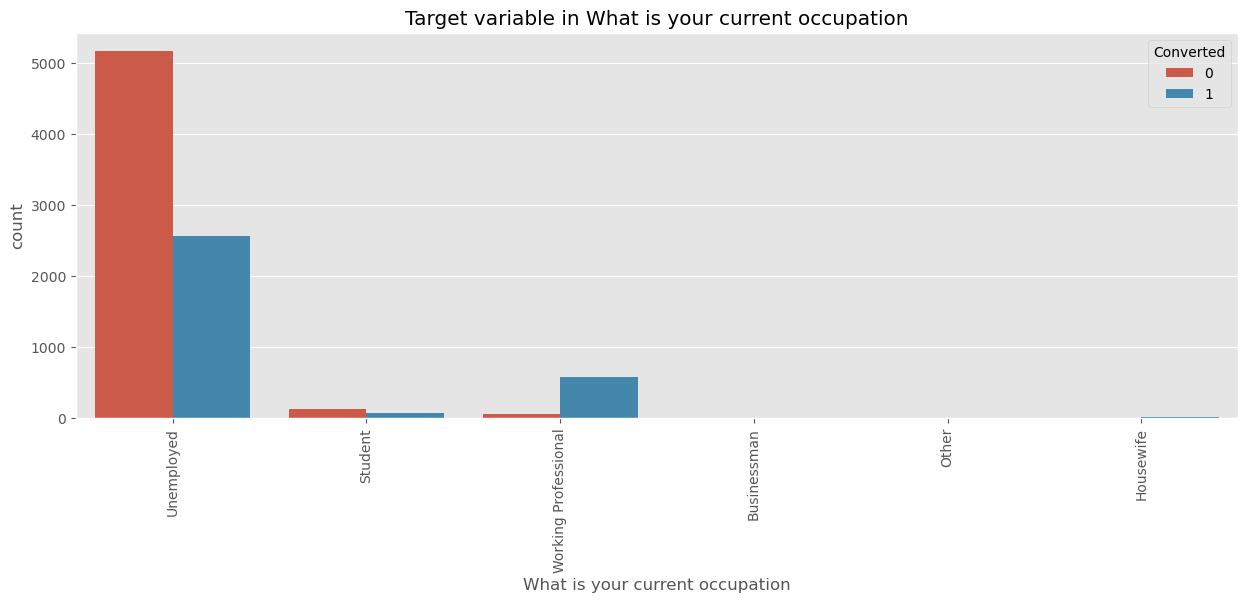

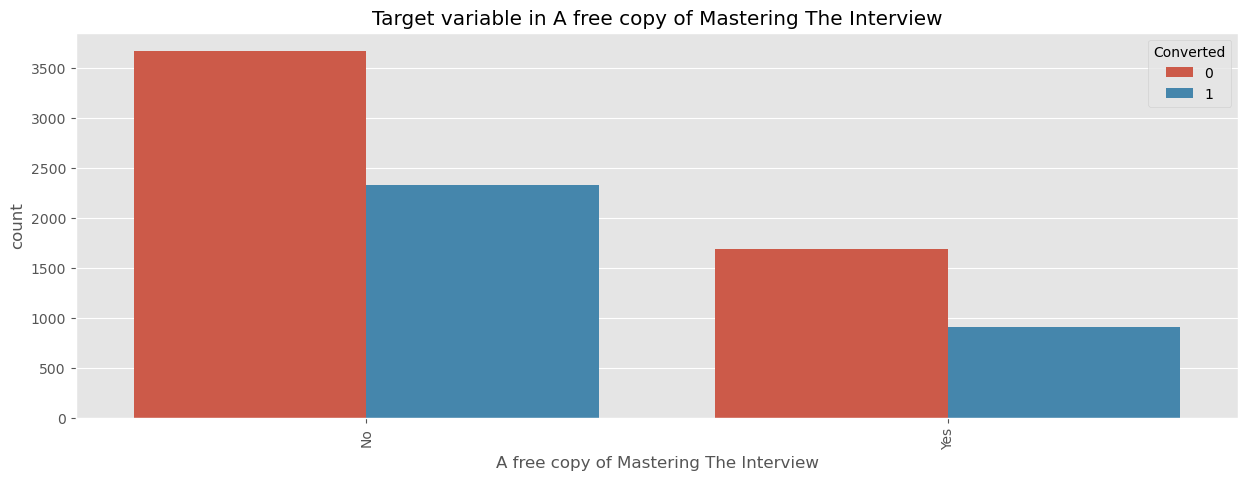

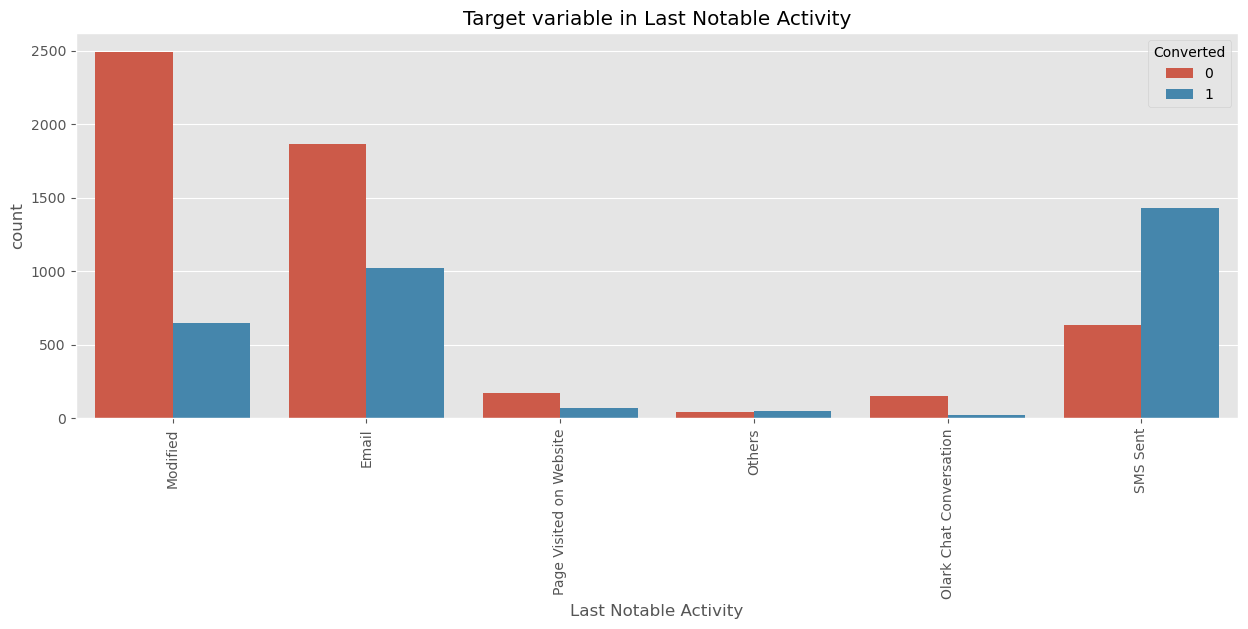

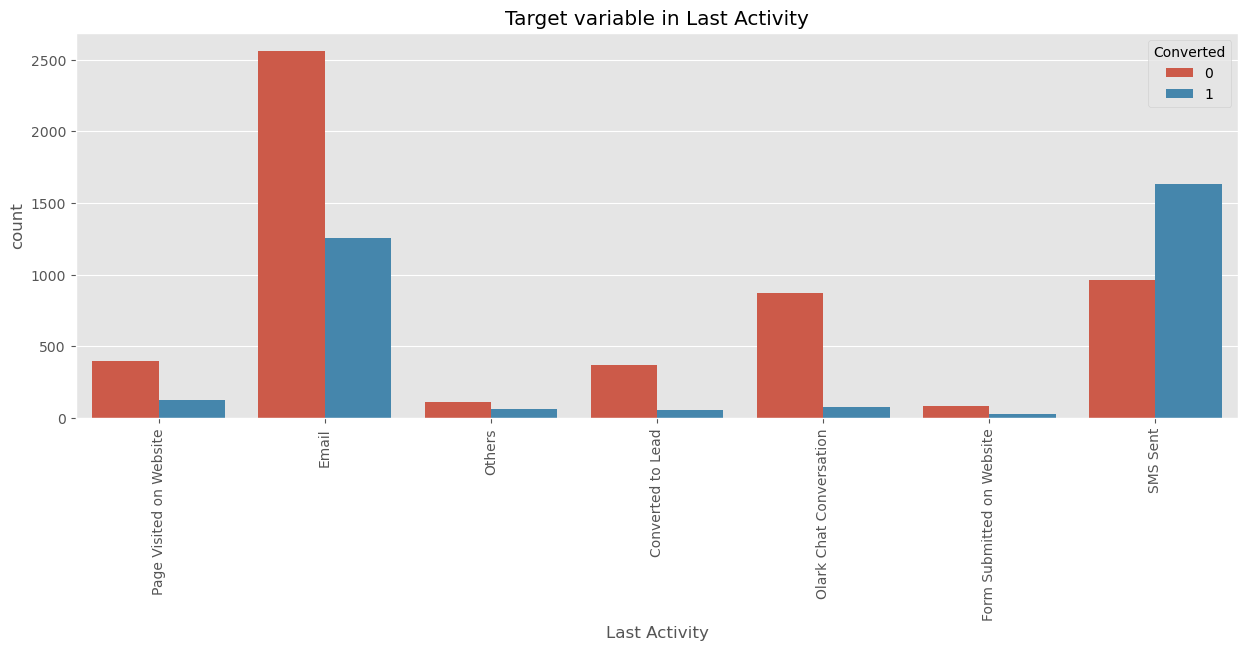

In [35]:
conv = df.select_dtypes(include="object").columns

for i in conv:
    plt.figure(figsize=(15, 5))
    sns.countplot(data=df, x=i, hue='Converted')
    plt.xticks(rotation=90)
    plt.title('Target variable in ' + i)
    plt.xlabel(i)
    plt.show()

# Observations from EDA Process -
1. Maximum lead conversion happened from Landing Page Submission followed by API.
2. Major lead conversion in the lead source is from 'Google' followed by direct traffic
3. Major lead conversion is from the Unemployed Group for Better Career Prospects
4. Major lead conversion from TotalVisits, Total Time Spent on Website, Page Views Per Visit
5. Major conversion has happened when the last activity is SMS sent and Opened the EMail

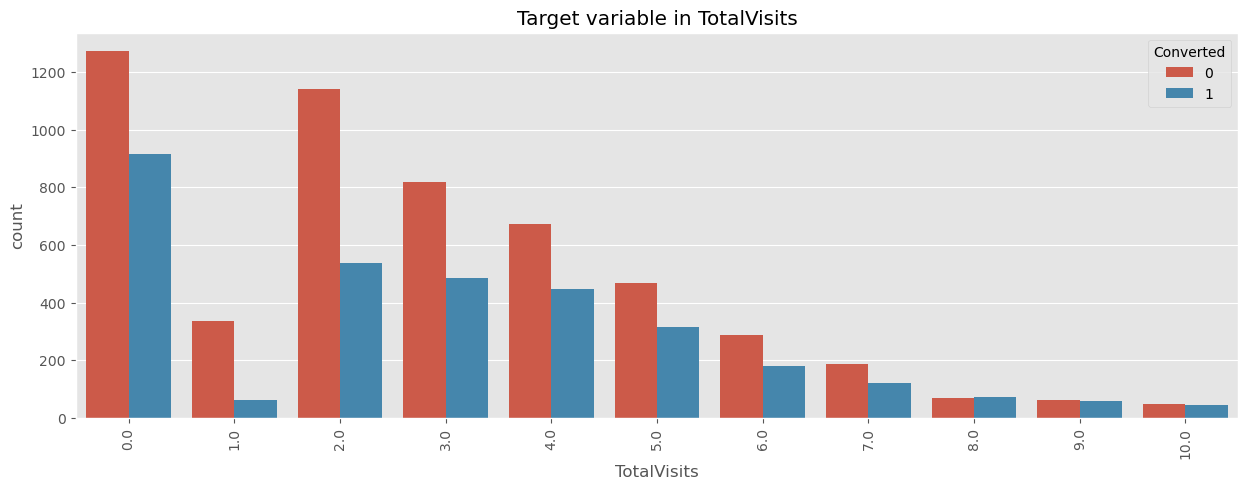

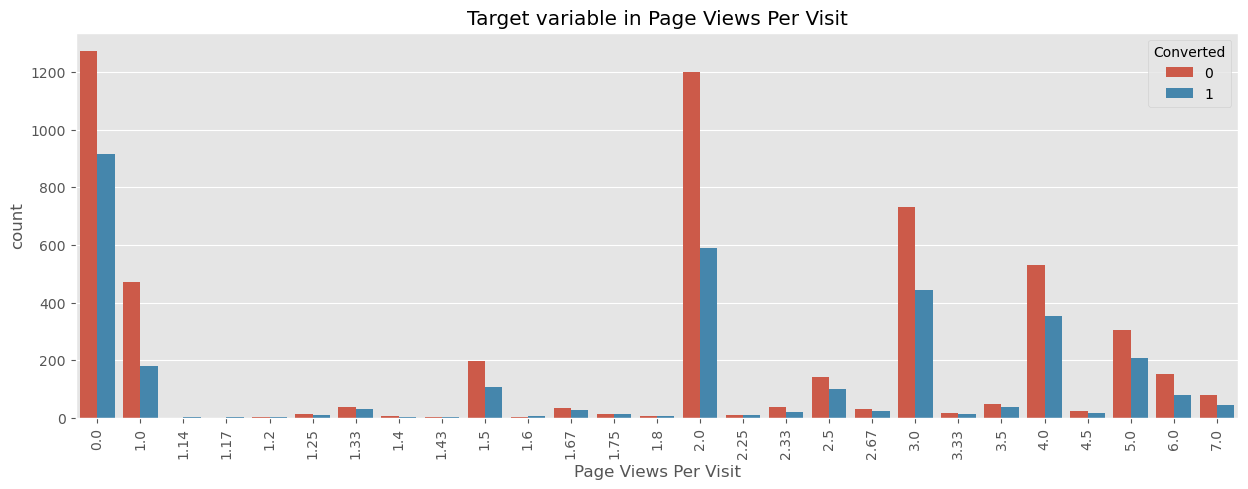

In [36]:
conv = df.select_dtypes(include="float").columns

for i in conv:
    plt.figure(figsize=(15, 5))
    sns.countplot(data=df, x=i, hue='Converted')
    plt.xticks(rotation=90)
    plt.title('Target variable in ' + i)
    plt.xlabel(i)
    plt.show()

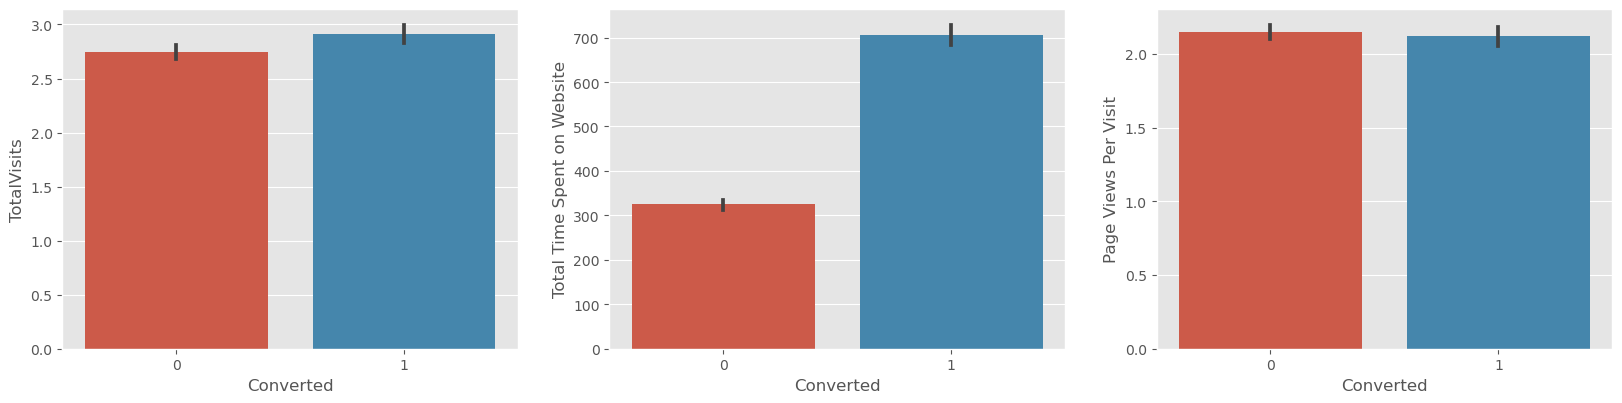

In [37]:
#Understanding the Lead Conversion on TotalVisits, Total Time Spent on Website, Page Views Per Visit
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.barplot(x = 'Converted', y = 'TotalVisits', data = df)

plt.subplot(3,3,2)
sns.barplot(x = 'Converted', y = 'Total Time Spent on Website',data = df)

plt.subplot(3,3,3)
sns.barplot(x = 'Converted', y = 'Page Views Per Visit',data = df)

plt.show()

"The graph indicates that a significant proportion of lead conversions is correlated with the variables 'TotalVisits,' 'Total Time Spent on Website,' and 'Page Views Per Visit.' Higher values in these metrics seem to be positively associated with increased lead conversion rates, suggesting that prospects who visit the website more frequently, spend more time on the site, and view more pages are more likely to convert into leads."



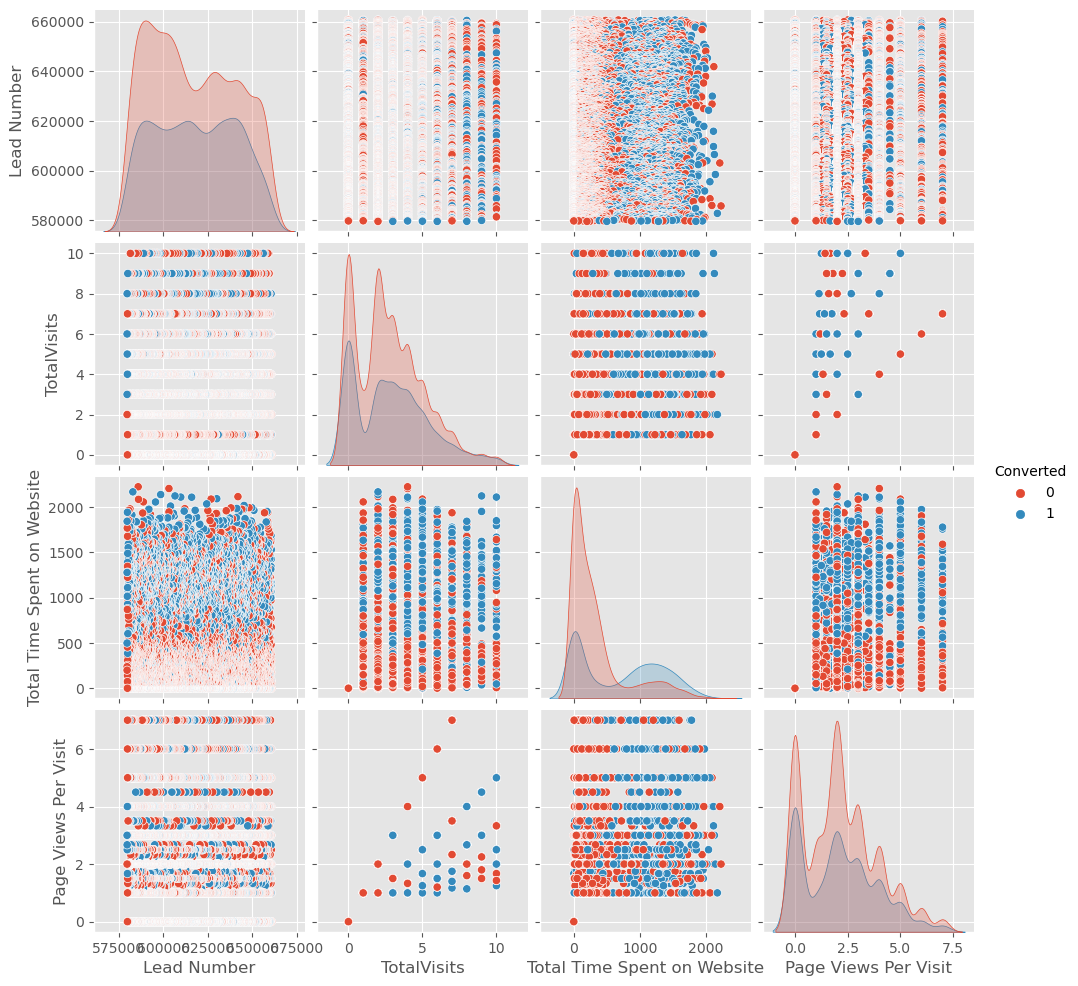

In [38]:
sns.pairplot(df,diag_kind='kde',hue='Converted')
plt.show()

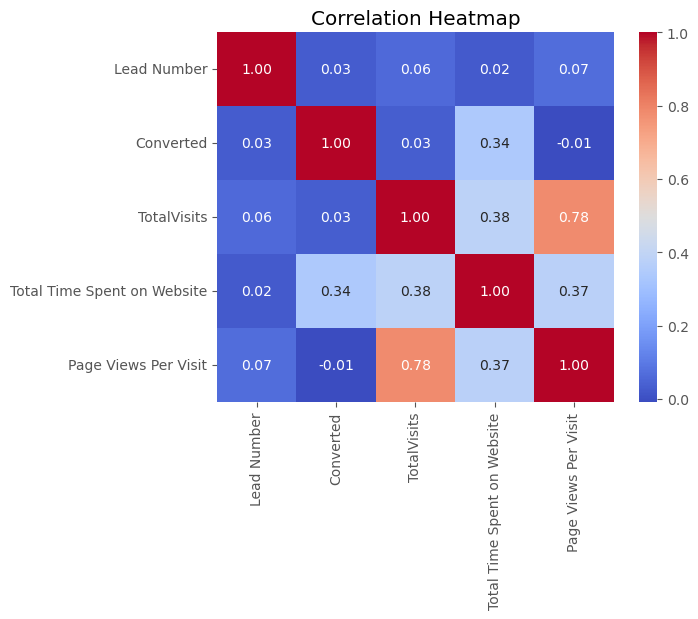

In [39]:
# Filter columns with integer and float data types
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Create a correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Based on the correlation matrix generated, here are some possible inferences:**

**1. TotalVisits and Page Views Per Visit:**

There is a moderate positive correlation of approximately 0.78 between TotalVisits and Page Views Per Visit.
This suggests that, on average, as the total number of visits increases, there tends to be a higher number of pages viewed per visit.

**2.Total Time Spent on Website and Converted:**

There is a moderate positive correlation of approximately 0.34 between Total Time Spent on Website and the likelihood of conversion (Converted).
This implies that prospects who spend more time on the website are more likely to convert.

**3.TotalVisits and Converted:**

The correlation between TotalVisits and Converted is relatively low (0.03).
There is a weak positive correlation, suggesting that there may be a slight tendency for leads with more visits to have a slightly higher likelihood of conversion.

**4. Page Views Per Visit and Converted:**

The correlation between Page Views Per Visit and Converted is slightly negative (-0.008).
This weak negative correlation suggests that, on average, a higher number of page views per visit is not strongly indicative of conversion.

# One Hot Encoding for Dummy Variables

In [40]:
df.loc[:, df.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Country',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Last Activity'],
      dtype='object')

In [41]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation','Country',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Convert True/False to 1/0 in the entire DataFrame
dummy = dummy.astype(int)

# Concatenate the dummy variables with the original DataFrame
leads = pd.concat([df, dummy], axis=1)


In [42]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Last Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Country_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,API,Olark Chat,0,0.0,0,0.0,India,Unemployed,No,Modified,Page Visited on Website,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,India,Unemployed,No,Email,Email,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,India,Student,Yes,Email,Email,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,India,Unemployed,No,Modified,Others,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,India,Unemployed,No,Modified,Converted to Lead,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [43]:
# List of columns to drop
leads.drop(['Lead Origin', 'Lead Source', 'Last Activity','Country',
        'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis = 1, inplace = True)


In [44]:
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Country_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


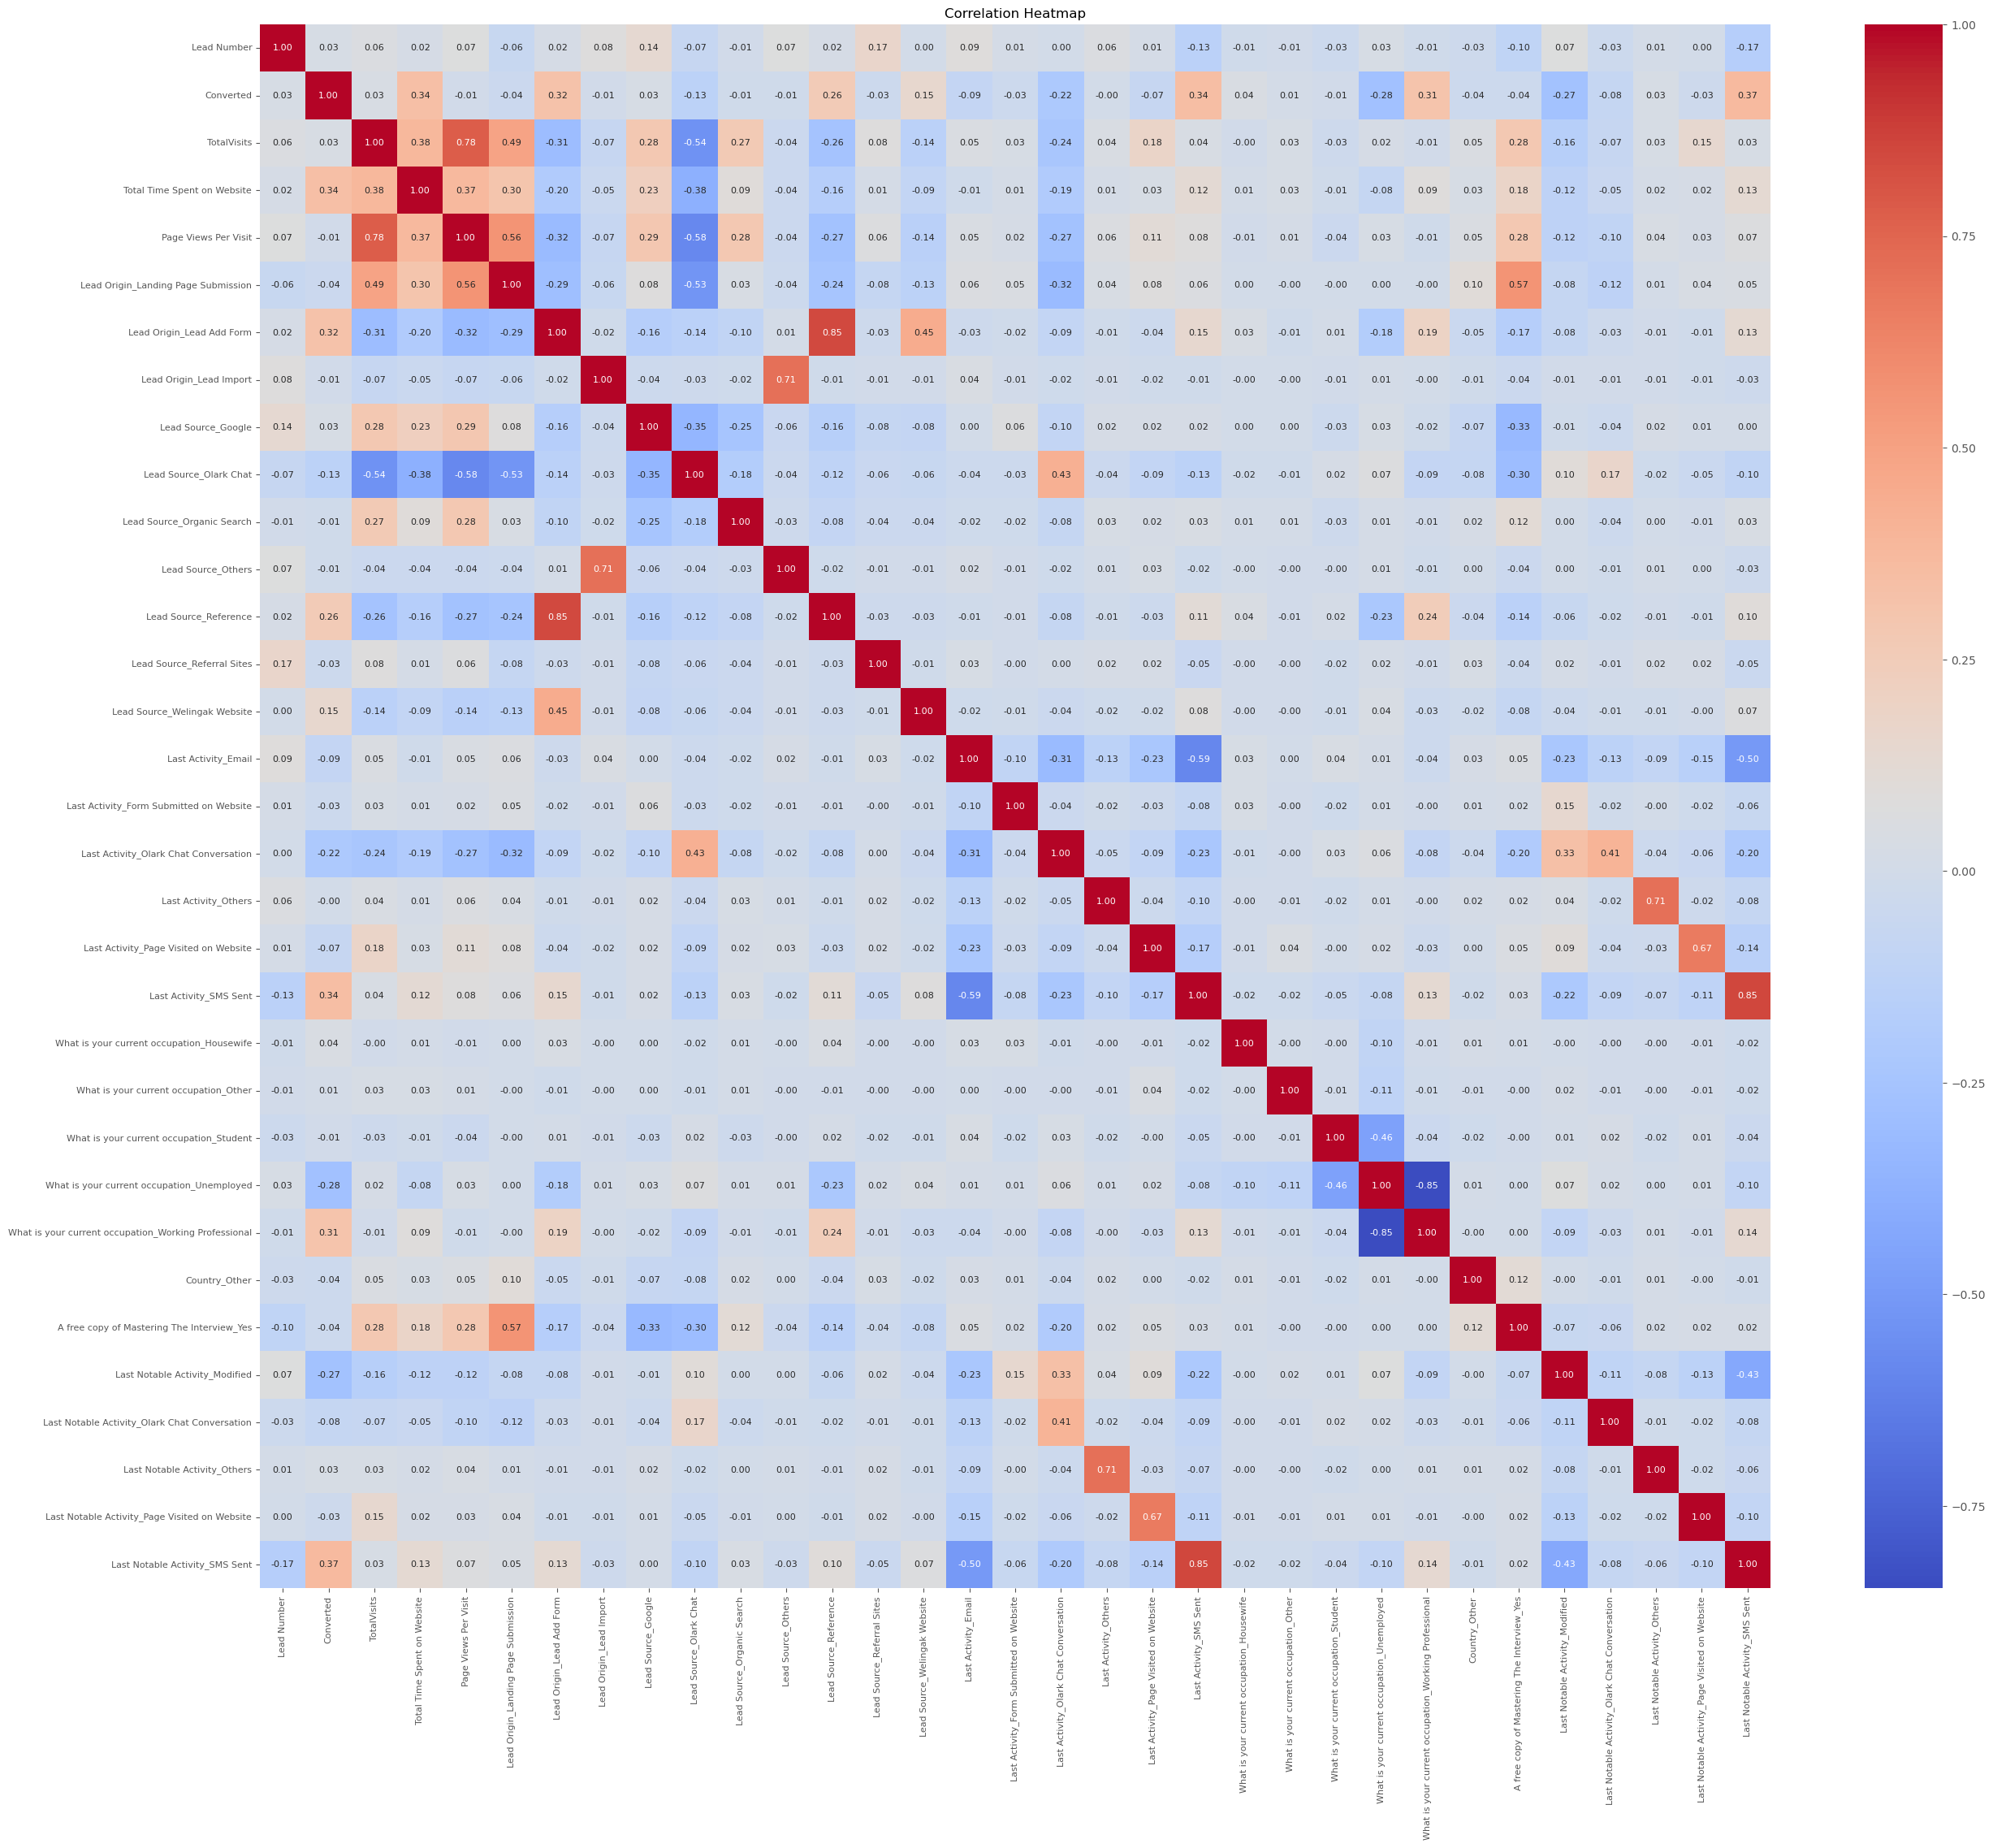

In [45]:

# Create the heatmap
plt.figure(figsize=(30,25))  # Adjust the figure size as needed
heatmap = sns.heatmap(leads.corr(), cmap="coolwarm", annot=True, fmt=".2f", annot_kws={"size": 8})

# Reduce the font size of annotations
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=8)

# Add title with reduced font size
plt.title("Correlation Heatmap", fontsize=12)

# Show the plot
plt.show()


In [46]:
# columns pairs in order of highest absolute correlation
leads.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(50)

Lead Number                                 Lead Number                                             1.000000
Last Activity_SMS Sent                      Last Notable Activity_SMS Sent                          0.853030
What is your current occupation_Unemployed  What is your current occupation_Working Professional    0.846857
Lead Source_Reference                       Lead Origin_Lead Add Form                               0.845896
Page Views Per Visit                        TotalVisits                                             0.780476
Last Notable Activity_Others                Last Activity_Others                                    0.707430
Lead Source_Others                          Lead Origin_Lead Import                                 0.706293
Last Activity_Page Visited on Website       Last Notable Activity_Page Visited on Website           0.667952
Last Activity_Email                         Last Activity_SMS Sent                                  0.588068
Lead Source_Olark C

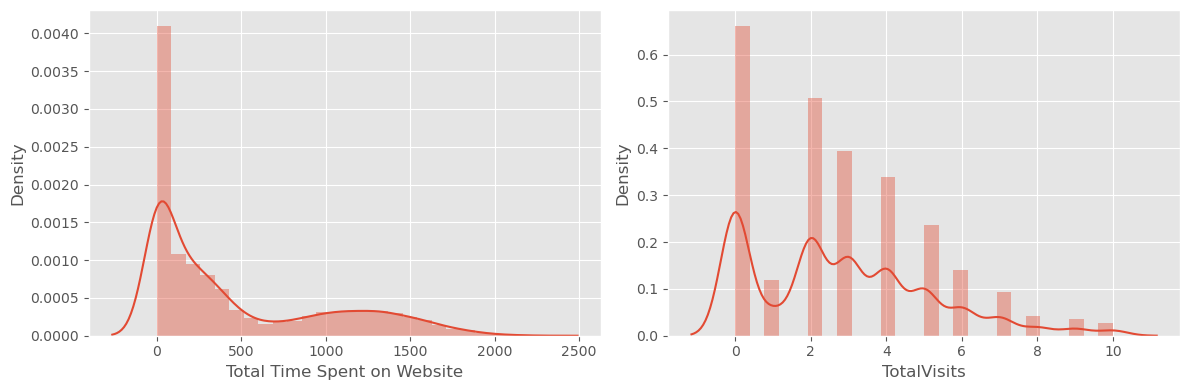

In [47]:
#Histogram
def plot_bars():
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    sns.distplot(leads['Total Time Spent on Website'])

    plt.subplot(122)
    sns.distplot(leads['TotalVisits'])

    plt.tight_layout()
    plt.show()
    
plot_bars()

## Step 2: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

### Test-Train Split

The next step is to spliting the dataset into training an testing sets.

In [48]:
# Assuming 'Converted' is the target variable, and you want to create X with other features
# List of columns to drop
columns_to_drop = ['Converted']

# Create X by dropping the specified columns
X = leads.drop(columns=columns_to_drop)

# Display the resulting DataFrame
X.head()


,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Country_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,660681,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [49]:
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [50]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [51]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (6017, 32)
y_train Size (6017,)


### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [52]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Country_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
8426,585501,0.6,0.117700,0.428571,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
1703,642841,0.3,0.016622,0.428571,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6533,599661,0.0,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1508,644261,0.4,0.143756,0.571429,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7895,589296,0.2,0.498652,0.285714,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0


In [53]:
# Importing the 'LogisticRegression' and creating a LogisticRegression object
logreg = LogisticRegression()

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming you have already defined X_train and y_train

# Create a logistic regression model
logreg = LogisticRegression()

# RFE model with 15 variables
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit the model
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [55]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 18),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Others', False, 14),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 10),
 ('Lead Source_Welingak Website', False, 2),
 ('Last Activity_Email', True, 1),
 ('Last Activity_Form Submitted on Website', False, 9),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 12),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Housewife', False, 13),
 ('What is your current occupation_Other', False, 17),
 ('What is your current occupation_Student', False, 15),
 ('What i

In [56]:
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Country_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
8426,585501,0.6,0.117700,0.428571,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
1703,642841,0.3,0.016622,0.428571,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6533,599661,0.0,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1508,644261,0.4,0.143756,0.571429,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7895,589296,0.2,0.498652,0.285714,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0


In [57]:
# storing selected(True) columns by RFE in a list
rfe_col = X_train.columns[rfe.support_]

# listing features removed by RFE feature selection
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'Last Activity_Form Submitted on Website', 'Last Activity_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student', 'Country_Other',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [58]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,Lead Number,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
8426,585501,0.117700,1,0,0,0,1,0,0,0,1,0,1,1,0
1703,642841,0.016622,0,0,0,0,1,0,0,0,1,0,0,0,0
6533,599661,0.000000,0,0,1,0,1,0,0,0,1,0,0,0,0
1508,644261,0.143756,1,0,0,0,1,0,0,0,1,0,1,0,0
7895,589296,0.498652,1,0,0,0,0,0,0,0,1,0,1,1,0


# 1st Model

In [59]:
# creating 1st model

# Adding a constant
X_train_1=sm.add_constant(X_train_rfe)

# creating a model and fitting it.

logr1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial()).fit()   # Using GLM for creating model and fitting it
logr1.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6017
Model:                            GLM   Df Residuals:                     6001
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2496.8
Date:                Sun, 14 Jan 2024   Deviance:                       4993.5
Time:                        15:38:01   Pearson chi2:                 6.21e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3899
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -8.7907      1.031     -8.524      0.000     -10.812      -6.769
Lead Number                                           1.137e-05    1.6e-06      7.116      0.000    8.24e-06    1.45e-05
Total Time Spent on Website                              4.3914      0.166     26.489      0.000       4.067       4.716
Lead Origin_Landing Page Submission                     -0.1938      0.102     -1.900      0.057      -0.394       0.006
Lead Origin_Lead Add Form                                4.6346      0.475      9.754      0.000       3.703       5.566
Lead Source_Olark Chat                                   1.1366      0.122      9.303      0.000       0.897       1.376
Lead Source_Reference                                   -0.2445      0.541     -0.452      0.652      -1.306       0.817
Last Activity_Email                                      0.3393      0.162      2.088      0.037       0.021       0.658
Last Activity_Olark Chat Conversation                   -1.1289      0.225     -5.014      0.000      -1.570      -0.688
Last Activity_Page Visited on Website                    0.0071      0.212      0.033      0.973      -0.409       0.423
Last Activity_SMS Sent                                   0.9934      0.194      5.122      0.000       0.613       1.374
What is your current occupation_Unemployed              -0.7007      0.211     -3.324      0.001      -1.114      -0.287
What is your current occupation_Working Professional     2.0859      0.276      7.547      0.000       1.544       2.628
A free copy of Mastering The Interview_Yes              -0.1050      0.091     -1.155      0.248      -0.283       0.073
Last Notable Activity_Modified                          -0.6566      0.105     -6.249      0.000      -0.863      -0.451
Last Notable Activity_SMS Sent                           0.8355      0.183      4.557      0.000       0.476       1.195
========================================================================================================================
"""

In [60]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,Lead Number,57.09
10,What is your current occupation_Unemployed,34.26
9,Last Activity_SMS Sent,8.37
6,Last Activity_Email,7.57
14,Last Notable Activity_SMS Sent,6.55
2,Lead Origin_Landing Page Submission,4.55
3,Lead Origin_Lead Add Form,4.23
11,What is your current occupation_Working Profes...,3.85
5,Lead Source_Reference,3.82
13,Last Notable Activity_Modified,2.99


### As VIF of Lead Number feature is greater than 5, deleting the Feature

# 2nd Model

In [61]:
# Drop 'Lead Number' from X_train_1
X_train_rfe2 = X_train_1.drop(['Lead Number',"const"], axis=1)
X_train_rfe2.head()              

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
8426,0.117700,1,0,0,0,1,0,0,0,1,0,1,1,0
1703,0.016622,0,0,0,0,1,0,0,0,1,0,0,0,0
6533,0.000000,0,0,1,0,1,0,0,0,1,0,0,0,0
1508,0.143756,1,0,0,0,1,0,0,0,1,0,1,0,0
7895,0.498652,1,0,0,0,0,0,0,0,1,0,1,1,0


In [62]:
X_train_2=sm.add_constant(X_train_rfe2)                                 # Adding constant
logr2=sm.GLM(y_train,X_train_2,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr2.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6017
Model:                            GLM   Df Residuals:                     6002
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2522.4
Date:                Sun, 14 Jan 2024   Deviance:                       5044.8
Time:                        15:38:01   Pearson chi2:                 6.21e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3847
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7431      0.275     -6.334      0.000      -2.282      -1.204
Total Time Spent on Website                              4.3949      0.165     26.602      0.000       4.071       4.719
Lead Origin_Landing Page Submission                     -0.2347      0.102     -2.310      0.021      -0.434      -0.036
Lead Origin_Lead Add Form                                4.6057      0.475      9.699      0.000       3.675       5.536
Lead Source_Olark Chat                                   1.0457      0.121      8.655      0.000       0.809       1.282
Lead Source_Reference                                   -0.2230      0.541     -0.413      0.680      -1.283       0.837
Last Activity_Email                                      0.3181      0.162      1.961      0.050       0.000       0.636
Last Activity_Olark Chat Conversation                   -1.1516      0.225     -5.128      0.000      -1.592      -0.711
Last Activity_Page Visited on Website                   -0.0161      0.211     -0.076      0.939      -0.430       0.398
Last Activity_SMS Sent                                   0.9488      0.193      4.926      0.000       0.571       1.326
What is your current occupation_Unemployed              -0.6208      0.207     -2.997      0.003      -1.027      -0.215
What is your current occupation_Working Professional     2.1527      0.273      7.883      0.000       1.617       2.688
A free copy of Mastering The Interview_Yes              -0.1421      0.090     -1.577      0.115      -0.319       0.035
Last Notable Activity_Modified                          -0.6369      0.105     -6.090      0.000      -0.842      -0.432
Last Notable Activity_SMS Sent                           0.7232      0.181      3.989      0.000       0.368       1.078
========================================================================================================================
"""

In [63]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values,i) for i in range(X_train_rfe2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,13.24
8,Last Activity_SMS Sent,7.94
13,Last Notable Activity_SMS Sent,6.40
5,Last Activity_Email,5.75
1,Lead Origin_Landing Page Submission,4.37
2,Lead Origin_Lead Add Form,4.20
4,Lead Source_Reference,3.82
12,Last Notable Activity_Modified,2.66
6,Last Activity_Olark Chat Conversation,2.38
3,Lead Source_Olark Chat,2.36


### As VIF of 'What is your current occupation_Unemployed' feature is greater than 5, deleting the Feature

# 3rd Model

In [64]:
# Drop 'Lead Number' from X_train_1
X_train_rfe3 = X_train_1.drop(['Lead Number',"const",'What is your current occupation_Unemployed'], axis=1)
X_train_rfe3.head()                

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
8426,0.117700,1,0,0,0,1,0,0,0,0,1,1,0
1703,0.016622,0,0,0,0,1,0,0,0,0,0,0,0
6533,0.000000,0,0,1,0,1,0,0,0,0,0,0,0
1508,0.143756,1,0,0,0,1,0,0,0,0,1,0,0
7895,0.498652,1,0,0,0,0,0,0,0,0,1,1,0


In [65]:
X_train_rfe3.shape

(6017, 13)

In [66]:
X_train_3=sm.add_constant(X_train_rfe3)                                 # Adding constant
logr3=sm.GLM(y_train,X_train_3,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr3.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6017
Model:                            GLM   Df Residuals:                     6003
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2526.8
Date:                Sun, 14 Jan 2024   Deviance:                       5053.5
Time:                        15:38:01   Pearson chi2:                 6.21e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3838
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3552      0.185    -12.722      0.000      -2.718      -1.992
Total Time Spent on Website                              4.3976      0.165     26.638      0.000       4.074       4.721
Lead Origin_Landing Page Submission                     -0.2289      0.101     -2.257      0.024      -0.428      -0.030
Lead Origin_Lead Add Form                                4.5951      0.475      9.680      0.000       3.665       5.525
Lead Source_Olark Chat                                   1.0530      0.121      8.728      0.000       0.817       1.289
Lead Source_Reference                                   -0.1889      0.540     -0.350      0.727      -1.248       0.870
Last Activity_Email                                      0.3271      0.162      2.018      0.044       0.009       0.645
Last Activity_Olark Chat Conversation                   -1.1366      0.224     -5.066      0.000      -1.576      -0.697
Last Activity_Page Visited on Website                   -0.0087      0.211     -0.041      0.967      -0.423       0.405
Last Activity_SMS Sent                                   0.9406      0.192      4.887      0.000       0.563       1.318
What is your current occupation_Working Professional     2.7540      0.186     14.811      0.000       2.390       3.118
A free copy of Mastering The Interview_Yes              -0.1442      0.090     -1.602      0.109      -0.321       0.032
Last Notable Activity_Modified                          -0.6338      0.105     -6.065      0.000      -0.839      -0.429
Last Notable Activity_SMS Sent                           0.7270      0.181      4.015      0.000       0.372       1.082
========================================================================================================================
"""

In [67]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,Last Activity_SMS Sent,7.00
12,Last Notable Activity_SMS Sent,6.11
2,Lead Origin_Lead Add Form,4.14
1,Lead Origin_Landing Page Submission,4.07
4,Lead Source_Reference,3.82
5,Last Activity_Email,2.79
3,Lead Source_Olark Chat,2.25
0,Total Time Spent on Website,2.16
11,Last Notable Activity_Modified,2.13
10,A free copy of Mastering The Interview_Yes,2.12


### As VIF of 'Last Activity_SMS Sent' feature is greater than 5, deleting the Feature

# 4th Model

In [68]:
# Drop 'Lead Number' from X_train_1
X_train_rfe4 = X_train_1.drop(['Lead Number',"const",'What is your current occupation_Unemployed','Last Activity_SMS Sent'], axis=1)
X_train_rfe4.head()  

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
8426,0.117700,1,0,0,0,1,0,0,0,1,1,0
1703,0.016622,0,0,0,0,1,0,0,0,0,0,0
6533,0.000000,0,0,1,0,1,0,0,0,0,0,0
1508,0.143756,1,0,0,0,1,0,0,0,1,0,0
7895,0.498652,1,0,0,0,0,0,0,0,1,1,0


In [69]:
X_train_rfe4.shape

(6017, 12)

In [70]:
X_train_4=sm.add_constant(X_train_rfe4)                                 # Adding constant
logr4=sm.GLM(y_train,X_train_4,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr4.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6017
Model:                            GLM   Df Residuals:                     6004
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2538.9
Date:                Sun, 14 Jan 2024   Deviance:                       5077.9
Time:                        15:38:01   Pearson chi2:                 6.24e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3813
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9547      0.159    -12.328      0.000      -2.266      -1.644
Total Time Spent on Website                              4.4226      0.165     26.841      0.000       4.100       4.746
Lead Origin_Landing Page Submission                     -0.2236      0.101     -2.214      0.027      -0.422      -0.026
Lead Origin_Lead Add Form                                4.7140      0.475      9.921      0.000       3.783       5.645
Lead Source_Olark Chat                                   1.0848      0.120      9.009      0.000       0.849       1.321
Lead Source_Reference                                   -0.2525      0.541     -0.467      0.640      -1.312       0.807
Last Activity_Email                                     -0.1020      0.129     -0.791      0.429      -0.355       0.151
Last Activity_Olark Chat Conversation                   -1.5954      0.199     -8.004      0.000      -1.986      -1.205
Last Activity_Page Visited on Website                   -0.4469      0.186     -2.400      0.016      -0.812      -0.082
What is your current occupation_Working Professional     2.7491      0.185     14.834      0.000       2.386       3.112
A free copy of Mastering The Interview_Yes              -0.1419      0.090     -1.580      0.114      -0.318       0.034
Last Notable Activity_Modified                          -0.5883      0.103     -5.692      0.000      -0.791      -0.386
Last Notable Activity_SMS Sent                           1.2509      0.149      8.377      0.000       0.958       1.544
========================================================================================================================
"""

In [71]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe4.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe4.values,i) for i in range(X_train_rfe4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,4.06
1,Lead Origin_Landing Page Submission,3.94
4,Lead Source_Reference,3.82
5,Last Activity_Email,2.45
3,Lead Source_Olark Chat,2.15
11,Last Notable Activity_SMS Sent,2.15
9,A free copy of Mastering The Interview_Yes,2.12
0,Total Time Spent on Website,2.10
10,Last Notable Activity_Modified,1.82
6,Last Activity_Olark Chat Conversation,1.72


### As P>|z| of 'Lead Source_Reference' feature is greater than 0.05, hence deleting the Feature

# 5th Model

In [72]:
# Drop 'Lead Number' from X_train_1
X_train_rfe5 = X_train_1.drop(['Lead Number',"const",'What is your current occupation_Unemployed','Last Activity_SMS Sent','Lead Source_Reference'], axis=1)
X_train_rfe5.head()  

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
8426,0.117700,1,0,0,1,0,0,0,1,1,0
1703,0.016622,0,0,0,1,0,0,0,0,0,0
6533,0.000000,0,0,1,1,0,0,0,0,0,0
1508,0.143756,1,0,0,1,0,0,0,1,0,0
7895,0.498652,1,0,0,0,0,0,0,1,1,0


In [73]:
X_train_5=sm.add_constant(X_train_rfe5)                                 # Adding constant
logr5=sm.GLM(y_train,X_train_5,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr5.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6017
Model:                            GLM   Df Residuals:                     6005
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2539.1
Date:                Sun, 14 Jan 2024   Deviance:                       5078.1
Time:                        15:38:01   Pearson chi2:                 6.25e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3813
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9528      0.159    -12.320      0.000      -2.263      -1.642
Total Time Spent on Website                              4.4227      0.165     26.841      0.000       4.100       4.746
Lead Origin_Landing Page Submission                     -0.2235      0.101     -2.213      0.027      -0.421      -0.026
Lead Origin_Lead Add Form                                4.5315      0.253     17.883      0.000       4.035       5.028
Lead Source_Olark Chat                                   1.0849      0.120      9.010      0.000       0.849       1.321
Last Activity_Email                                     -0.1042      0.129     -0.808      0.419      -0.357       0.148
Last Activity_Olark Chat Conversation                   -1.5959      0.199     -8.009      0.000      -1.986      -1.205
Last Activity_Page Visited on Website                   -0.4480      0.186     -2.406      0.016      -0.813      -0.083
What is your current occupation_Working Professional     2.7483      0.185     14.827      0.000       2.385       3.112
A free copy of Mastering The Interview_Yes              -0.1422      0.090     -1.583      0.113      -0.318       0.034
Last Notable Activity_Modified                          -0.5897      0.103     -5.706      0.000      -0.792      -0.387
Last Notable Activity_SMS Sent                           1.2493      0.149      8.369      0.000       0.957       1.542
========================================================================================================================
"""

In [74]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe5.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe5.values,i) for i in range(X_train_rfe5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,3.94
4,Last Activity_Email,2.45
10,Last Notable Activity_SMS Sent,2.15
3,Lead Source_Olark Chat,2.14
8,A free copy of Mastering The Interview_Yes,2.11
0,Total Time Spent on Website,2.10
9,Last Notable Activity_Modified,1.82
5,Last Activity_Olark Chat Conversation,1.72
2,Lead Origin_Lead Add Form,1.34
6,Last Activity_Page Visited on Website,1.19


### As P>|z| of 'Last Activity_Email' feature is greater than 0.05, hence deleting the Feature

# 6th Model

In [75]:
# Drop 'Lead Number' from X_train_1
X_train_rfe6 = X_train_1.drop(['Lead Number',"const",'What is your current occupation_Unemployed','Last Activity_SMS Sent','Lead Source_Reference','Last Activity_Email'], axis=1)
X_train_rfe6.head()  

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
8426,0.117700,1,0,0,0,0,0,1,1,0
1703,0.016622,0,0,0,0,0,0,0,0,0
6533,0.000000,0,0,1,0,0,0,0,0,0
1508,0.143756,1,0,0,0,0,0,1,0,0
7895,0.498652,1,0,0,0,0,0,1,1,0


In [76]:
X_train_6=sm.add_constant(X_train_rfe6)                                 # Adding constant
logr6=sm.GLM(y_train,X_train_6,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr6.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6017
Model:                            GLM   Df Residuals:                     6006
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2539.4
Date:                Sun, 14 Jan 2024   Deviance:                       5078.8
Time:                        15:38:02   Pearson chi2:                 6.25e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3812
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0506      0.103    -19.967      0.000      -2.252      -1.849
Total Time Spent on Website                              4.4252      0.165     26.857      0.000       4.102       4.748
Lead Origin_Landing Page Submission                     -0.2238      0.101     -2.215      0.027      -0.422      -0.026
Lead Origin_Lead Add Form                                4.5294      0.253     17.877      0.000       4.033       5.026
Lead Source_Olark Chat                                   1.0787      0.120      8.983      0.000       0.843       1.314
Last Activity_Olark Chat Conversation                   -1.5264      0.180     -8.492      0.000      -1.879      -1.174
Last Activity_Page Visited on Website                   -0.3731      0.162     -2.310      0.021      -0.690      -0.057
What is your current occupation_Working Professional     2.7469      0.185     14.826      0.000       2.384       3.110
A free copy of Mastering The Interview_Yes              -0.1405      0.090     -1.564      0.118      -0.317       0.036
Last Notable Activity_Modified                          -0.5433      0.086     -6.345      0.000      -0.711      -0.375
Last Notable Activity_SMS Sent                           1.3473      0.087     15.448      0.000       1.176       1.518
========================================================================================================================
"""

In [77]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe6.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe6.values,i) for i in range(X_train_rfe6.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,3.11
7,A free copy of Mastering The Interview_Yes,2.11
0,Total Time Spent on Website,1.86
8,Last Notable Activity_Modified,1.79
4,Last Activity_Olark Chat Conversation,1.55
9,Last Notable Activity_SMS Sent,1.55
3,Lead Source_Olark Chat,1.51
2,Lead Origin_Lead Add Form,1.16
6,What is your current occupation_Working Profes...,1.14
5,Last Activity_Page Visited on Website,1.10


### As P>|z| of 'A free copy of Mastering The Interview_Yes' feature is greater than 0.05, hence deleting the Feature

# 7th Model

In [79]:
# Drop 'Lead Number' from X_train_1
X_train_rfe7 = X_train_1.drop(['Lead Number',"const",'What is your current occupation_Unemployed','Last Activity_SMS Sent','Lead Source_Reference','Last Activity_Email','A free copy of Mastering The Interview_Yes'], axis=1)
X_train_rfe7.head()  

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
8426,0.117700,1,0,0,0,0,0,1,0
1703,0.016622,0,0,0,0,0,0,0,0
6533,0.000000,0,0,1,0,0,0,0,0
1508,0.143756,1,0,0,0,0,0,0,0
7895,0.498652,1,0,0,0,0,0,1,0


In [80]:
X_train_7=sm.add_constant(X_train_rfe7)                                 # Adding constant
logr7=sm.GLM(y_train,X_train_7,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr7.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6017
Model:                            GLM   Df Residuals:                     6007
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.6
Date:                Sun, 14 Jan 2024   Deviance:                       5081.2
Time:                        15:38:02   Pearson chi2:                 6.26e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3810
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0554      0.103    -20.020      0.000      -2.257      -1.854
Total Time Spent on Website                              4.4225      0.165     26.855      0.000       4.100       4.745
Lead Origin_Landing Page Submission                     -0.2955      0.090     -3.276      0.001      -0.472      -0.119
Lead Origin_Lead Add Form                                4.5301      0.253     17.880      0.000       4.034       5.027
Lead Source_Olark Chat                                   1.0773      0.120      8.965      0.000       0.842       1.313
Last Activity_Olark Chat Conversation                   -1.5248      0.180     -8.472      0.000      -1.878      -1.172
Last Activity_Page Visited on Website                   -0.3751      0.161     -2.323      0.020      -0.692      -0.059
What is your current occupation_Working Professional     2.7534      0.185     14.858      0.000       2.390       3.117
Last Notable Activity_Modified                          -0.5418      0.086     -6.327      0.000      -0.710      -0.374
Last Notable Activity_SMS Sent                           1.3482      0.087     15.471      0.000       1.177       1.519
========================================================================================================================
"""

In [81]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe7.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe7.values,i) for i in range(X_train_rfe7.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.05
0,Total Time Spent on Website,1.85
7,Last Notable Activity_Modified,1.79
4,Last Activity_Olark Chat Conversation,1.55
8,Last Notable Activity_SMS Sent,1.55
3,Lead Source_Olark Chat,1.50
2,Lead Origin_Lead Add Form,1.16
6,What is your current occupation_Working Profes...,1.14
5,Last Activity_Page Visited on Website,1.10


### This Model looks okay as VIF<5 and P|z| is less than 0.05. Therefore moving ahead with Model 7

In [82]:
# checking all the coefficients
logr7.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               4.530120
Total Time Spent on Website                             4.422485
What is your current occupation_Working Professional    2.753437
Last Notable Activity_SMS Sent                          1.348210
Lead Source_Olark Chat                                  1.077277
Lead Origin_Landing Page Submission                    -0.295494
Last Activity_Page Visited on Website                  -0.375145
Last Notable Activity_Modified                         -0.541825
Last Activity_Olark Chat Conversation                  -1.524806
const                                                  -2.055407
dtype: float64

# Prediction on Train Set

In [83]:
#predicting train dataset with final model

y_train_pred=logr7.predict(X_train_7)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()   # viewing first 5 rows

,Converted,Converted_probability,ID
8426,0,0.085317,8426
1703,0,0.121117,1703
6533,0,0.273263,6533
1508,0,0.152498,1508
7895,1,0.334602,7895


# ROC Curve Generation

In [84]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def draw_roc(actual, probability):
    
    # Creating roc curve to get true positive rate, false positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( actual, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( actual, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(15,10))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis limit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    
    plt.show()

    return None   # no return

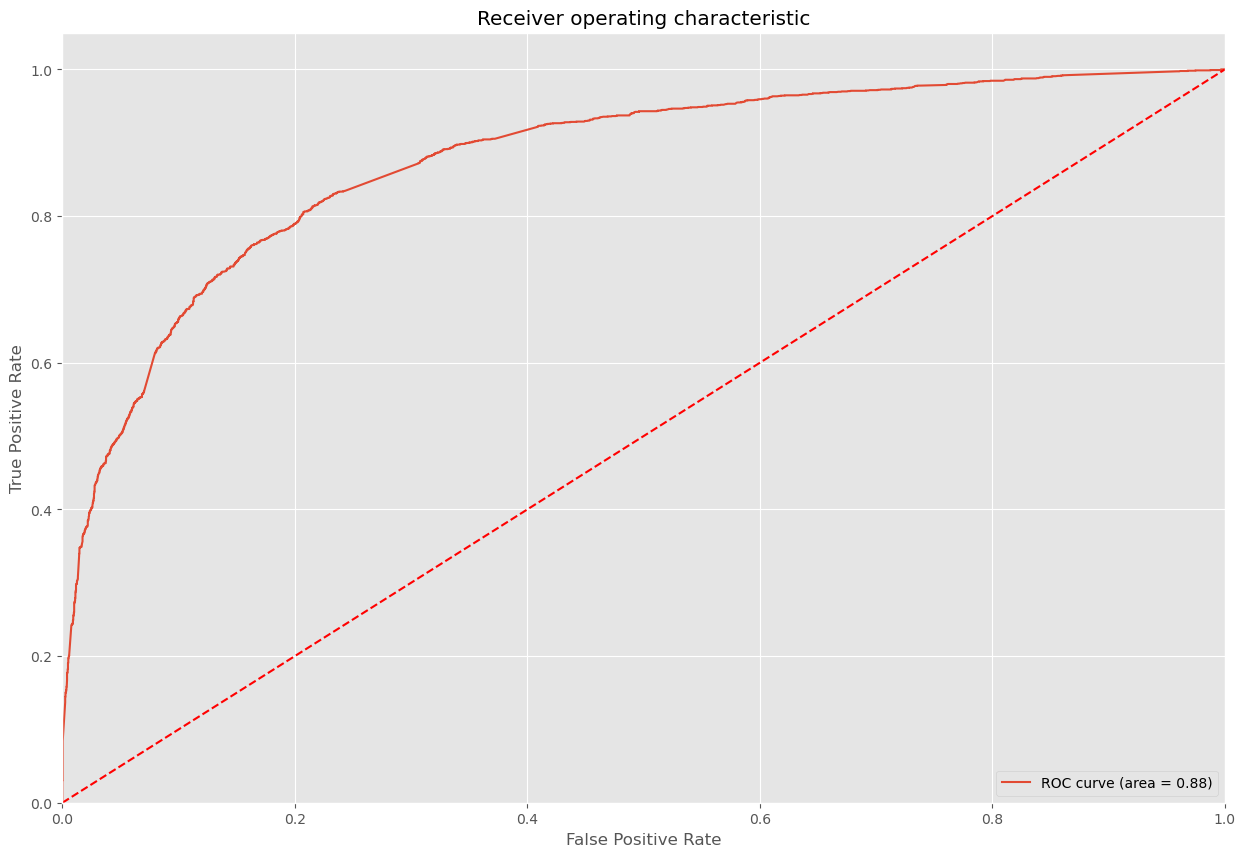

In [85]:
# Calling the roc curve function for plotting

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

<strong><span style="color:Blue">NOTE:</span></strong> Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

### Finding Optimal Cutoff Point/ Probability
- It is that probability where we get `balanced sensitivity and specificity`

In [86]:
# creating 10 points of probabilities to find the optimal point cutoff

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
8426,0,0.085317,8426,1,0,0,0,0,0,0,0,0,0
1703,0,0.121117,1703,1,1,0,0,0,0,0,0,0,0
6533,0,0.273263,6533,1,1,1,0,0,0,0,0,0,0
1508,0,0.152498,1508,1,1,0,0,0,0,0,0,0,0
7895,1,0.334602,7895,1,1,1,1,0,0,0,0,0,0


In [87]:
# Calculating accuracy, sensitivity and specificity with probability cutoffs

# importing necessary library

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.375935    1.000000     0.000000
0.1          0.1  0.596477    0.964633     0.374700
0.2          0.2  0.744723    0.899646     0.651398
0.3          0.3  0.792754    0.822281     0.774967
0.4          0.4  0.807545    0.748453     0.843142
0.5          0.5  0.809207    0.673740     0.890812
0.6          0.6  0.790427    0.556145     0.931558
0.7          0.7  0.780954    0.494253     0.953662
0.8          0.8  0.760512    0.405836     0.974168
0.9          0.9  0.719794    0.271883     0.989614


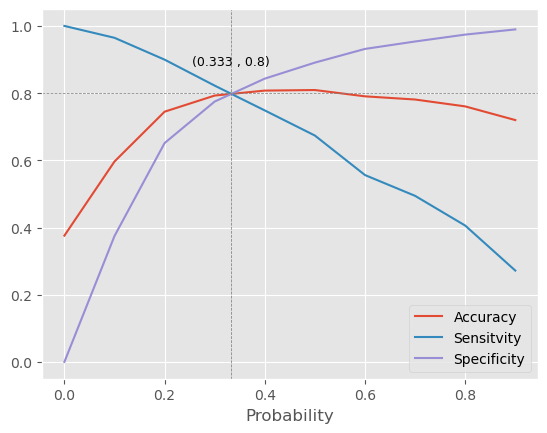

In [88]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(df_cutoffs['Probability'], df_cutoffs['Sensitvity'], kind='linear')
acc_interp = interp1d(df_cutoffs['Probability'], df_cutoffs['Accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(df_cutoffs['Probability'], df_cutoffs['Specificity'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
df_cutoffs.plot.line(x='Probability', y=['Accuracy', 'Sensitvity', 'Specificity'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


<strong><span style="color:Blue">NOTE:</span></strong> 0.356 is the approx. point where all the curves meet, so 0.356 seems to be our `Optimal cutoff point` for probability threshold .
- Lets do mapping again using optimal cutoff point 

In [89]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.333 else 0 )  # Predicted value 

y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
8426,0,0.085317,8426,1,0,0,0,0,0,0,0,0,0,0
1703,0,0.121117,1703,1,1,0,0,0,0,0,0,0,0,0
6533,0,0.273263,6533,1,1,1,0,0,0,0,0,0,0,0
1508,0,0.152498,1508,1,1,0,0,0,0,0,0,0,0,0
7895,1,0.334602,7895,1,1,1,1,0,0,0,0,0,0,1


###  Calculating all metrics using confusion matrix for Train


In [90]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [91]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[2989  766]
 [ 462 1800]] 

************************************************** 

True Negative                    :  2989
True Positive                    :  1800
False Negative                   :  462
False Positve                    :  766
Model Accuracy                   :  0.7959
Model Sensitivity                :  0.7958
Model Specificity                :  0.796
Model Precision                  :  0.7015
Model Recall                     :  0.7958
Model True Positive Rate (TPR)   :  0.7958
Model False Positive Rate (FPR)  :  0.204


************************************************** 



In [92]:
# Checking accuracy for train dataset 
from sklearn import metrics

Accuracy_train = round(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)*100,2)
print('Train set Accuracy:',Accuracy_train)

Train set Accuracy: 79.59


<strong><span style="color:Blue">NOTE:</span></strong> Overall Train set Accuracy: !~80%


## Precision and recall tradeoff
- Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

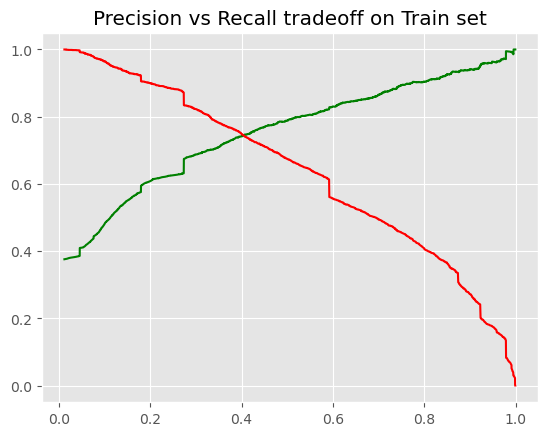

In [93]:
# importing precision recall curve from sklearn library for train set

from sklearn.metrics import precision_recall_curve, f1_score

# Creating precision recall curve by creating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff on Train set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

<strong><span style="color:Blue">NOTE:</span></strong> The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve.

In [94]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [95]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_probability'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted,precision_recall_prediction
8426,0,0.085317,8426,1,0,0,0,0,0,0,0,0,0,0,0
1703,0,0.121117,1703,1,1,0,0,0,0,0,0,0,0,0,0
6533,0,0.273263,6533,1,1,1,0,0,0,0,0,0,0,0,0
1508,0,0.152498,1508,1,1,0,0,0,0,0,0,0,0,0,0
7895,1,0.334602,7895,1,1,1,1,0,0,0,0,0,0,1,0


In [96]:
## Lets see all matrics at 0.42 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")


************************************************** 

Confusion Matrix
[[3189  566]
 [ 591 1671]] 

************************************************** 

True Negative                    :  3189
True Positive                    :  1671
False Negative                   :  591
False Positve                    :  566
Model Accuracy                   :  0.8077
Model Sensitivity                :  0.7387
Model Specificity                :  0.8493
Model Precision                  :  0.747
Model Recall                     :  0.7387
Model True Positive Rate (TPR)   :  0.7387
Model False Positive Rate (FPR)  :  0.1507


************************************************** 



<strong><span style="color:Blue">NOTE:</span></strong> 0.41 gives better result. Thus moving with it

# Prediction on the test dataset
### Scaling the test dataset

In [97]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2580 entries, 4393 to 6669
Data columns (total 32 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           2580 non-null   int64  
 1   TotalVisits                                           2580 non-null   float64
 2   Total Time Spent on Website                           2580 non-null   int64  
 3   Page Views Per Visit                                  2580 non-null   float64
 4   Lead Origin_Landing Page Submission                   2580 non-null   int32  
 5   Lead Origin_Lead Add Form                             2580 non-null   int32  
 6   Lead Origin_Lead Import                               2580 non-null   int32  
 7   Lead Source_Google                                    2580 non-null   int32  
 8   Lead Source_Olark Chat                                2580 n

In [98]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [99]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2580, 33)

In [100]:
# Predicting the test dataset with our final model

test_cols=X_train_7.columns[1:]              # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=logr7.predict(X_test_final)      # Predicting the final test set

In [101]:
# top 10 columns
y_pred_test[:10]

4393    0.273263
1212    0.074385
2132    0.990864
4791    0.998609
2803    0.133989
1773    0.656057
5336    0.086096
2927    0.045444
6873    0.179468
1969    0.591478
dtype: float64

In [102]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_pred_test)
y_test_pred.head()

,0
4393,0.273263
1212,0.074385
2132,0.990864
4791,0.998609
2803,0.133989


In [103]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4393,1
1212,0
2132,1
4791,1
2803,1


In [104]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4393,0.273263
1,0,1212,0.074385
2,1,2132,0.990864
3,1,4791,0.998609
4,1,2803,0.133989


In [105]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4393,1,0.273263
1,1212,0,0.074385
2,2132,1,0.990864
3,4791,1,0.998609
4,2803,1,0.133989


In [106]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4393,1,0.273263,0
1,1212,0,0.074385,0
2,2132,1,0.990864,1
3,4791,1,0.998609,1
4,2803,1,0.133989,0


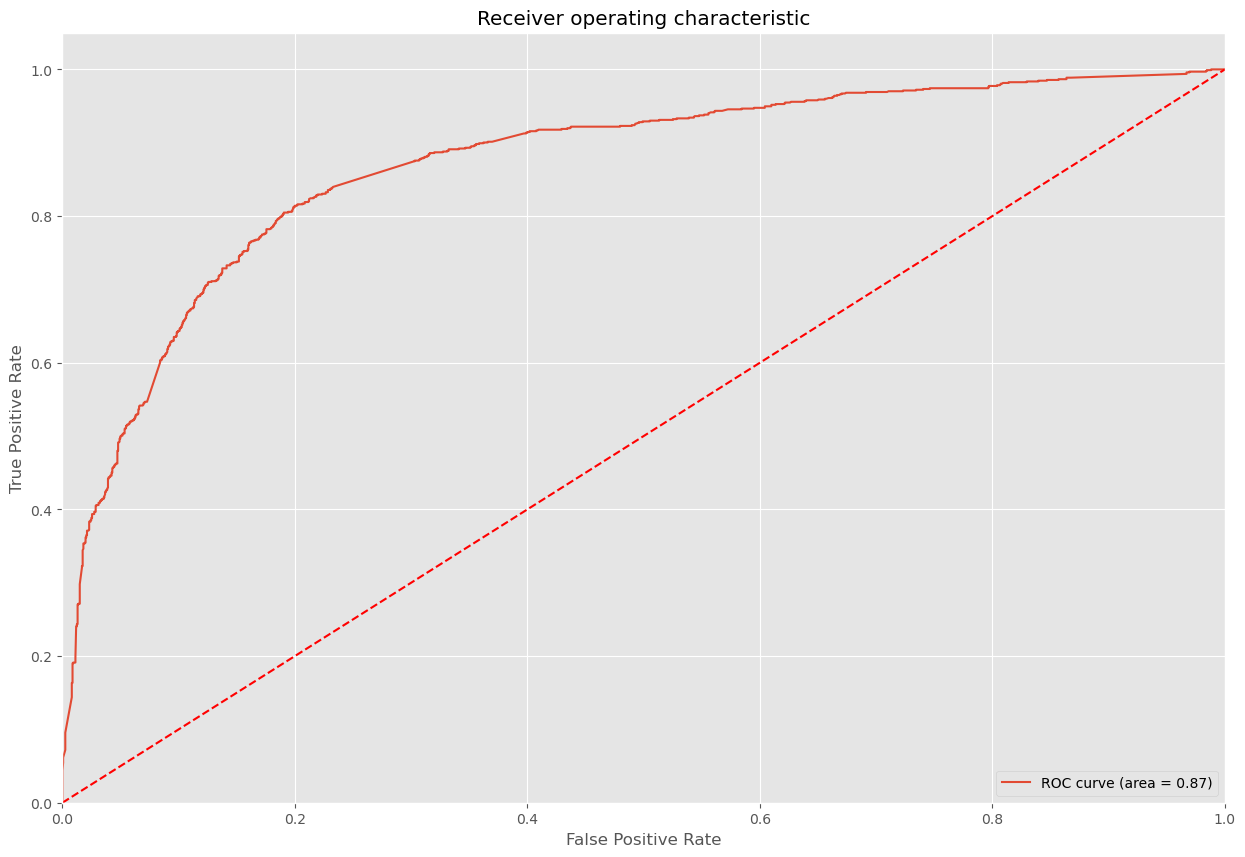

In [107]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

<strong><span style="color:Blue">NOTE:</span></strong> Area under ROC curve is 0.87 out of 1 which indicates a good predictive model

<strong><span style="color:Blue">NOTE:</span></strong> 
- Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set. 
- We will do this by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.

In [108]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1382  225]
 [ 264  709]] 

************************************************** 

True Negative                    :  1382
True Positive                    :  709
False Negative                   :  264
False Positve                    :  225
Model Accuracy                   :  0.8105
Model Sensitivity                :  0.7287
Model Specificity                :  0.86
Model Precision                  :  0.7591
Model Recall                     :  0.7287
Model True Positive Rate (TPR)   :  0.7287
Model False Positive Rate (FPR)  :  0.14


************************************************** 



<strong><span style="color:Blue">NOTE:</span></strong> The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.
- `For Test set`
    - Accuracy : 81%
    - Sensitivity : 73%%
    - Specificity : 86%
    
These matrices are very close to train set, so out final model logr3 is  performing with good consistency on both Train & Test set

In [109]:
# features and their coefficicent from final model
parameters=logr7.params.sort_values(ascending=False)
parameters

Lead Origin_Lead Add Form                               4.530120
Total Time Spent on Website                             4.422485
What is your current occupation_Working Professional    2.753437
Last Notable Activity_SMS Sent                          1.348210
Lead Source_Olark Chat                                  1.077277
Lead Origin_Landing Page Submission                    -0.295494
Last Activity_Page Visited on Website                  -0.375145
Last Notable Activity_Modified                         -0.541825
Last Activity_Olark Chat Conversation                  -1.524806
const                                                  -2.055407
dtype: float64

<strong><span style="color:Blue">NOTE:</span></strong> A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take up X-Education's course.

## <strong><span style="color:purple"> Adding `Lead Score` Feature to Test dataframe </span></strong> 
- A higher score would mean that the lead is hot, i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [110]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4393,1,0.273263,0,27
1,1212,0,0.074385,0,7
2,2132,1,0.990864,1,99
3,4791,1,0.998609,1,100
4,2803,1,0.133989,0,13


<strong><span style="color:purple">Lead Score: </span></strong> Lead Score is assigned to the customers
- The customers with a higher lead score have a higher conversion chance 
- The customers with a lower lead score have a lower conversion chance.

# 📌<strong><span style="color:brown">Conclusion </span></strong> 
It was found that the variables that mattered the most in identifying potential buyers are (in descending order):

1. **Lead Origin_Lead Add Form (4.530120):**
 - The high positive score suggests that this particular lead origin has a strong positive impact on predicting lead conversion. Leads from this source are more likely to convert.

2. **Total Time Spent on Website (4.422485):**
 - The high positive score indicates that the more time a user spends on the website, the more likely they are to convert. It suggests that user engagement on the website is a significant predictor of lead conversion.

3. **What is your current occupation_Working Professional (2.753437):**
 - The positive score indicates that leads with a current occupation of "Working Professional" are more likely to convert compared to other occupations.

4. **Last Notable Activity_SMS Sent (1.348210):**
 - The positive score suggests that sending an SMS as the last notable activity is positively correlated with lead conversion. Leads who received an SMS as the last notable activity are more likely to convert.

5. **Lead Source_Olark Chat (1.077277):**
 - The positive score indicates that leads coming from Olark Chat are more likely to convert compared to other lead sources.

6. **Lead Source:** Certain lead sources significantly contribute to conversions, particularly:
   - Google
   - Direct traffic
   - Organic search
   - Visits through the Welingak website

7. **Last Activity:** The nature of the last activity performed by the potential buyer plays a crucial role, especially activities like:
   - SMS interactions
   - Olark chat conversations
   
8. **Current Occupation:** Individuals identified as working professionals are more likely to convert into buyers.

9. **What is your current occupation_Working Professional:** working professionals are more likely to convert into buyers.

Keeping these in mind, X Education can flourish as they have a very high chance to persuade potential buyers to change their mind and buy their courses.